# Ensinando Machine Learning do zero - Live Solidária

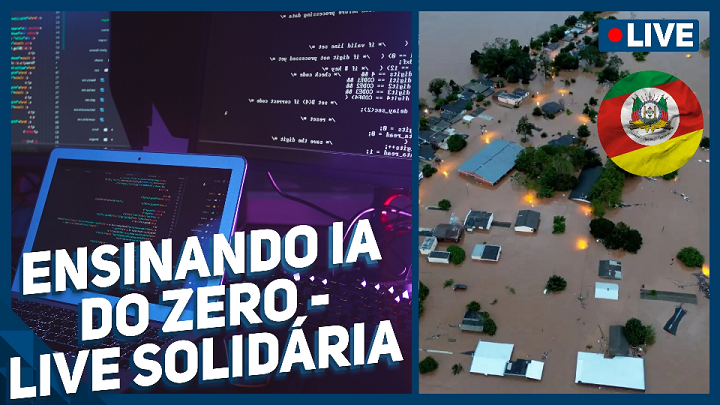

## Estrutura da aula:

1. Introdução ao Google Colab
2. Conhecendo o Kaggle
3. Pré-processamento de Dados
   1. Lidar com Dados Faltantes
   2. Codificar Dados Categóricos
   3. Dividir em treino e teste
   4. Escalar features
4. Classificação usando Regressão Logística

# Tópico 1: Introdução ao Google Colab e Kaggle

- Explicar o que é o Google Colab e suas vantagens.
- Mostrar como criar um novo notebook e executar uma célula de código.

# Tópico 2: Import de bibliotecas e dataset

- Demonstração de como importar as bibliotecas necessárias (pandas, numpy, sklearn).
- Carregar um dataset simples usando pandas (vamos usar o Titanic Dataset, disponível em: https://www.kaggle.com/datasets/pavlofesenko/titanic-extended).
- Obter noções simples sobre os dados.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

# Carregando o dataset de um arquivo CSV
data_path = 'full.csv'  # Caminho do arquivo no Colab
df = pd.read_csv(data_path)

# Mostrando as primeiras linhas do DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


O método df.info() é usado para obter um resumo conciso do DataFrame, incluindo informações úteis como o tipo de indexação, número de colunas, tipos de dados das colunas, e o número de valores não nulos. Isso é especialmente útil para ter uma visão rápida da estrutura e das características dos dados que você está lidando.

Esse resumo é útil para identificar problemas potenciais com dados faltantes, entender a composição das colunas do DataFrame, e planejar os próximos passos na limpeza e análise dos dados.

In [ ]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

O método df.describe() gera um resumo estatístico das colunas numéricas de um DataFrame, fornecendo informações úteis sobre a distribuição dos dados.

Estatísticas Fornecidas:
* count: Número de entradas não nulas. Isso ajuda a identificar colunas com valores faltantes.
* mean: Média dos valores na coluna.
* std: Desvio padrão, que indica a dispersão dos dados em relação à média.
* min: Valor mínimo encontrado na coluna.
* 25% (Primeiro Quartil): Valor abaixo do qual estão 25% dos dados.
* 50% (Mediana): Valor que divide o conjunto de dados ao meio, ou seja, 50% dos dados estão abaixo desse valor e 50% acima.
* 75% (Terceiro Quartil): Valor abaixo do qual estão 75% dos dados.
* max: Valor máximo encontrado na coluna.

In [ ]:
# Estatísticas descritivas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [ ]:
column = 'Embarked'

# Visualizar valores únicos para o porto de embarque
unique_embarked = df[column].unique()

# Exibir os valores únicos
print(f"Valores únicos na coluna '{column}': {unique_embarked}")

Valores únicos na coluna 'Embarked': ['S' 'C' 'Q' nan]


# Tópico 3: Lidar com dados faltantes

In [ ]:
# Primeiro, é útil identificar onde estão os dados faltantes:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

## Estratégias adotadas

### 1. Exclusão de Dados Faltantes

A estratégia mais simples, mas drástica, é excluir registros que contêm qualquer dado faltante.

É recomendado quando a quantidade de dados faltantes é insignificante comparada ao tamanho do dataset, de modo que a remoção não afeta significativamente a análise.

No entanto, é bom observar se essa remoção não introduz viés.

In [ ]:
df_dropped = df.dropna()

df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  0 non-null      int64  
 1   Survived     0 non-null      float64
 2   Pclass       0 non-null      int64  
 3   Name         0 non-null      object 
 4   Sex          0 non-null      object 
 5   Age          0 non-null      float64
 6   SibSp        0 non-null      int64  
 7   Parch        0 non-null      int64  
 8   Ticket       0 non-null      object 
 9   Fare         0 non-null      float64
 10  Cabin        0 non-null      object 
 11  Embarked     0 non-null      object 
 12  WikiId       0 non-null      float64
 13  Name_wiki    0 non-null      object 
 14  Age_wiki     0 non-null      float64
 15  Hometown     0 non-null      object 
 16  Boarded      0 non-null      object 
 17  Destination  0 non-null      object 
 18  Lifeboat     0 non-null      object 
 19  Body         0 non-null  

Problema:

- Esta abordagem pode remover uma quantidade significativa de dados, especialmente se muitos registros tiverem valores faltantes em diferentes colunas, o que pode levar à perda de informações valiosas.

Melhoria:

- Em vez de remover todas as linhas com valores faltantes, considere remover linhas com base em colunas específicas.

### 2. Imputação de Dados Faltantes

A imputação substitui os valores faltantes por estimativas. Dependendo da natureza dos dados e da distribuição, podemos usar média, mediana, moda ou outro valor relevante para a imputação.

Imputação de Valores Numéricos:

- Média: Útil quando os dados são distribuídos simetricamente.
- Mediana: Preferível quando os dados têm outliers ou uma distribuição assimétrica.

In [ ]:
# Média ou Mediana (para dados numéricos):
#df['Age'].fillna(df['Age'].mean(), inplace=True)  # Para média
#df['Age'].fillna(df['Age'].median(), inplace=True)  # Para mediana

# Moda ou Valor Constante (para dados categóricos):
#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Para moda
#df['Embarked'].fillna('Unknown', inplace=True)  # Para um valor constante

Imputação de Valores Categóricos:

- Moda: Substitui valores faltantes pelo valor mais frequente na coluna.

In [ ]:
# Encontrar a moda para o porto de embarque
#moda_embarked = df['Embarked'].mode()

# Exibir a moda
#print("Porto de embarque mais comum (Moda):", moda_embarked)

Porto de embarque mais comum (Moda): 0    S
Name: Embarked, dtype: object


In [ ]:
# Encontrar o índice do primeiro valor nulo na coluna
#first_null_index = df['Age'].isnull().idxmax()

#print(f"O primeiro valor nulo está na linha {first_null_index}.\n")

#df.iloc[first_null_index]

PassengerId                                                6
Survived                                                 0.0
Pclass                                                     3
Name                                        Moran, Mr. James
Sex                                                     male
Age                                                     28.0
SibSp                                                      0
Parch                                                      0
Ticket                                                330877
Fare                                                  8.4583
Cabin                                                    NaN
Embarked                                                   Q
WikiId                                                 785.0
Name_wiki      Doherty, Mr. William John (aka "James Moran")
Age_wiki                                                22.0
Hometown                                       Cork, Ireland
Boarded                 

In [ ]:
# Para o tratamento do dataset Titanic
df = df.drop(['PassengerId', 'Cabin', 'WikiId', 'Name_wiki', 'Age_wiki', 'Lifeboat', 'Body', 'Name', 'Pclass', 'Ticket', 'Hometown', 'Boarded', 'Destination'], axis=1) # Remoção de colunas que não serão úteis

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Survived'].fillna(df['Survived'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Class'].fillna(df['Class'].median(), inplace=True)

# Tópico 4: Codificação de Dados Categóricos

- Variáveis categóricas são aquelas que representam uma qualidade ou característica de uma unidade de dados e são selecionadas de um grupo de categorias, também chamadas de classes.

- Variáveis independentes são manipuladas ou controladas em um experimento para testar os efeitos sobre as variáveis dependentes. Em contextos de análise de dados, são os atributos ou características usados para prever ou explicar os valores de outra variável. Por exemplo, em um estudo para prever o peso de uma pessoa, as variáveis independentes podem incluir altura, idade, dieta e nível de atividade física.

- Variáveis dependentes são as que você tenta prever ou explicar dentro de um modelo ou experimento. Elas dependem das variáveis independentes, e é o resultado principal de interesse em muitos estudos. Continuando com o exemplo anterior, o peso seria a variável dependente se o objetivo fosse prever o peso com base em altura, idade, dieta e atividade física.

In [ ]:
# Quais são as colunas remanescentes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Class     1309 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 81.9+ KB


Dessas, as variáveis categóricas são: Sex, Class, Ticket, Embarked, Hometown, Boarded e Destination.

A variável dependente principal no contexto de análises do Titanic é a **Survived** (Sobrevivente), onde o objetivo é prever se o passageiro sobreviveu (1) ou não (0) ao desastre.

As demais variáveis como Sex, Age, SibSp, etc são independentes.

### Necessidade de codificação de variáveis categóricas

Machine learning e muitas formas de análise estatística são fundamentadas em operações matemáticas que precisam de números para serem executadas.

Os computadores, e por extensão os algoritmos de machine learning, não entendem texto ou categorias não numéricas diretamente. Eles operam usando cálculos matemáticos, que só podem ser realizados com números.

Portanto, quando estamos lidando com dados categóricos (como nomes de cidades, tipos de produtos, ou categorias como sim/não), precisamos convertê-los em formatos numéricos que podem ser interpretados e processados pelo computador. Aqui estão alguns motivos principais para essa necessidade:

- Operações Matemáticas: Algoritmos de machine learning frequentemente requerem medidas de distância, cálculos de média, ou operações similares que são impossíveis de realizar diretamente com dados textuais ou categóricos.
- Otimização de Modelos: Durante o treinamento de modelos, a otimização é tipicamente realizada usando métodos que minimizam ou maximizam alguma função de custo, algo que só pode ser feito numericamente.

### Técnicas de Codificação

- Label Encoding:
   - Definição: Converter cada categoria em um número. Por exemplo, {vermelho, verde, azul} pode ser codificado como {0, 1, 2}.
   - Quando Usar: Útil quando as categorias têm uma ordem natural (e.g., {baixo, médio, alto}).
   - Limitações: Implica uma ordem que pode não existir, o que pode levar a resultados enganosos em modelos.


- One-Hot Encoding:
   - Definição: Cria uma nova coluna para cada categoria e usa um esquema binário (0 ou 1) para indicar a presença de uma categoria.
   - Quando Usar: Não há ordem natural nas categorias e quando o número de categorias não é excessivamente grande.
   - Vantagens: Evita o problema de ordem implícita do Label Encoding.

In [ ]:
# Aplicando one-hot encoding em algumas colunas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Emb'])

# Aplicando label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'].astype(str))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1309 non-null   float64
 1   Age         1309 non-null   float64
 2   SibSp       1309 non-null   int64  
 3   Parch       1309 non-null   int64  
 4   Fare        1309 non-null   float64
 5   Class       1309 non-null   int64  
 6   Sex_female  1309 non-null   bool   
 7   Sex_male    1309 non-null   bool   
 8   Emb_C       1309 non-null   bool   
 9   Emb_Q       1309 non-null   bool   
 10  Emb_S       1309 non-null   bool   
dtypes: bool(5), float64(3), int64(3)
memory usage: 67.9 KB


# Tópico 5: Divisão em Teste e Treino

Dividir os dados em conjuntos de treino e teste é uma prática essencial em machine learning. Essa divisão permite que possamos treinar o modelo em um subconjunto dos dados e testar sua performance em outro subconjunto. O objetivo é avaliar como o modelo se comporta com dados que ele não viu durante o treinamento, o que é uma estimativa para o desempenho em dados futuros.

In [ ]:
from sklearn.model_selection import train_test_split

# Definindo as features e o target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando as dimensões dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train.shape[0]}')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]}')

Tamanho do conjunto de treino: 1047
Tamanho do conjunto de teste: 262


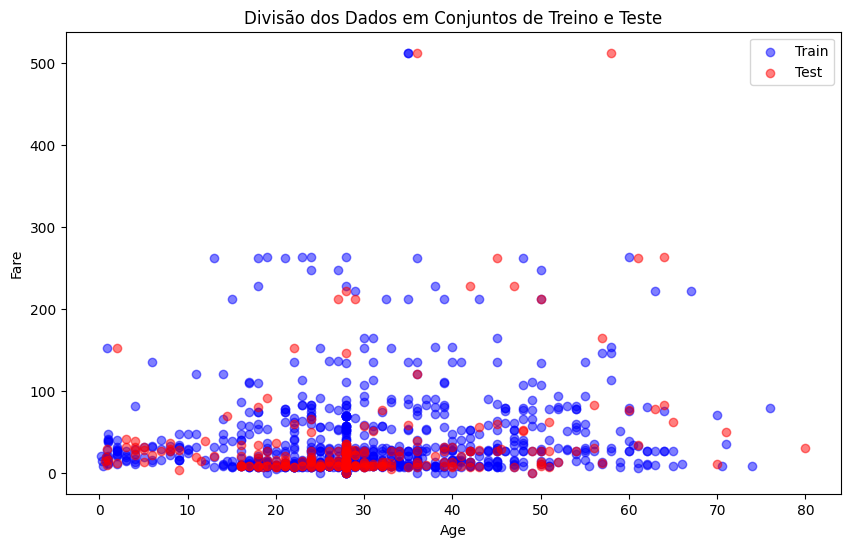

In [ ]:
import matplotlib.pyplot as plt

# Adicionando uma coluna para identificar os dados de treino e teste
X_train['Set'] = 'Train'
X_test['Set'] = 'Test'

# Combinando os conjuntos de treino e teste para visualização
X_combined = pd.concat([X_train, X_test])

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))

# Gráfico para dados de treino
plt.scatter(X_combined[X_combined['Set'] == 'Train']['Age'],
            X_combined[X_combined['Set'] == 'Train']['Fare'],
            c='blue', label='Train', alpha=0.5)

# Gráfico para dados de teste
plt.scatter(X_combined[X_combined['Set'] == 'Test']['Age'],
            X_combined[X_combined['Set'] == 'Test']['Fare'],
            c='red', label='Test', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Divisão dos Dados em Conjuntos de Treino e Teste')
plt.legend()
plt.show()

# Tópico 6. Escalamento de Features

A escala das features é importante porque muitos algoritmos de machine learning são sensíveis às diferenças de escala entre as variáveis. Ajustar a escala dos dados ajuda a melhorar a performance e a convergência dos algoritmos. Dois métodos comuns de escalonamento são *StandardScaler* e *MinMaxScaler*.

### StandardScaler

O StandardScaler ajusta os dados para que tenham uma média de 0 e um desvio padrão de 1.

Isso é feito subtraindo a média de cada feature e dividindo pelo desvio padrão.

- Quando usar:

  - Útil quando as features têm distribuições que variam em sua faixa de valores e é importante que todas as features contribuam de forma igualitária para o modelo.
  - Beneficia algoritmos que assumem que os dados seguem uma distribuição normal ou que são sensíveis à média e ao desvio padrão, como Regressão Logística e SVMs.

- Impacto no projeto:

  - Se as features do dataset têm valores que variam amplamente, StandardScaler ajudará a estabilizar a variação e a melhorar a performance de algoritmos que utilizam gradiente.

### MinMaxScaler

- Descrição:

  - O MinMaxScaler ajusta os dados para que estejam em uma faixa específica, geralmente [0, 1]. Isso é feito subtraindo o valor mínimo da feature e dividindo pela diferença entre o valor máximo e o valor mínimo.

- Quando usar:

   - Útil quando as features não têm distribuições normais e é necessário que os valores estejam em uma faixa específica.
   - Beneficia algoritmos baseados em distâncias, como KNN, e modelos que podem se beneficiar de features com a mesma escala, como Redes Neurais.

- Impacto no projeto:

   - Se as features têm valores em diferentes escalas, MinMaxScaler garantirá que todas estejam na mesma faixa, ajudando algoritmos que são sensíveis à escala dos dados.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Verificando a nova escala dos dados
X_train_scaled

array([[ 2.16065705, -0.48923943, -0.42965528, ..., -0.50834384,
        -0.30666576,  0.64113276],
       [ 0.19091006,  0.44209454, -0.42965528, ..., -0.50834384,
        -0.30666576,  0.64113276],
       [-0.59698874, -0.48923943, -0.42965528, ..., -0.50834384,
         3.26087923, -1.55973936],
       ...,
       [-0.99093813, -0.48923943, -0.42965528, ..., -0.50834384,
        -0.30666576,  0.64113276],
       [ 0.90001898,  1.37342851, -0.42965528, ..., -0.50834384,
        -0.30666576,  0.64113276],
       [-0.7545685 , -0.48923943, -0.42965528, ..., -0.50834384,
        -0.30666576,  0.64113276]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Ajustando e transformando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Verificando a nova escala dos dados
X_train_scaled

array([[0.74943954, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.41975471, 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.28788079, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22194382, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.53844125, 0.25      , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.261506  , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Tópico 7. Classificação usando Regressão Logística

A regressão logística é um modelo de classificação linear usado para prever a probabilidade de um resultado binário. Diferente da regressão linear, que prevê valores contínuos, a regressão logística prevê a probabilidade de uma instância pertencer a uma classe específica (por exemplo, sobrevivência ou não no Titanic).

- Quando usar: É adequado quando temos um problema de classificação binária e queremos interpretar as probabilidades dos resultados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Inicializando e treinando o modelo
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy}')
print('Matriz de confusão:')
print(conf_matrix)

#[[174  15]
# [ 47  26]]
# Verdadeiros Negativos (VN): 174
# Falsos Positivos (FP): 15
# Falsos Negativos (FN): 47
# Verdadeiros Positivos (VP): 26

Acurácia do modelo: 0.7633587786259542
Matriz de confusão:
[[174  15]
 [ 47  26]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculando a precisão
# A precisão mede a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.
# Prec = VP / (VP + FP)
precision = precision_score(y_test, y_pred)
print(f'Precisão: {precision:.2f}')

# Calculando a revocação (sensibilidade)
# A revocação mede a proporção de verdadeiros positivos corretamente identificados em relação ao total de
# verdadeiros positivos reais.
# Rev = VP / (VP + FN)
recall = recall_score(y_test, y_pred)
print(f'Revocação: {recall:.2f}')

# Calculando o F1-Score
# O F1-Score é a média harmônica da precisão e da revocação, proporcionando uma métrica equilibrada entre as duas.
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

Precisão: 0.63
Revocação: 0.36
F1-Score: 0.46


Importância de Cada Etapa
- Pré-processamento de Dados: Fundamental para garantir que os dados estejam limpos e em um formato adequado para o modelo, evitando problemas como overfitting ou bias (viés).
- Divisão de Dados: Importante para avaliar a generalização do modelo e verificar se ele não está memorizando os dados de treino.
- Escalamento de Features: Melhora a performance e a convergência de muitos algoritmos de machine learning, garantindo que todas as features contribuam de forma equilibrada para o modelo.
- Classificação e Avaliação: Crucial para entender a eficácia do modelo e identificar áreas de melhoria, usando métricas apropriadas para o problema.


Próximos Passos e Dicas
- Exploração de Outros Modelos: Experimente outros algoritmos de classificação como K-Nearest Neighbors, Support Vector Machines, ou Árvores de Decisão para comparar a performance.
- Aprimoramento do Modelo: Realize ajustes de hiperparâmetros (hyperparameter tuning) e use técnicas de validação cruzada para melhorar a robustez do modelo.
- Feature Engineering: Crie novas features a partir das existentes para melhorar a capacidade preditiva do modelo.
- Análise de Feature Importance: Utilize técnicas como Random Forest ou Gradient Boosting para identificar as features mais importantes para a previsão.
- Deploy do Modelo: Aprenda como implantar seu modelo em produção usando frameworks como Flask ou FastAPI.

Campanhas Solidárias:

🏁 Fãs de Fórmula 1 Unidos por Uma Causa

- Descrição: A comunidade de fãs de Fórmula 1 no Twitter se uniu para arrecadar fundos para ONGs no Sul, com foco em assistência para PCDs, animais e alimentação.

- Como Participar: Contribua para a vaquinha e concorra a kits exclusivos de produtos de Fórmula 1, incluindo o Lego do Senna.

Link: https://www.vakinha.com.br/4778208

💧 Campanha Solidária SBC - Ajuda às Vítimas das Enchentes

- Descrição: Continua a campanha para apoiar as vítimas das enchentes no Rio Grande do Sul. Já foram arrecadados mais de 19 mil reais e distribuídos em alimentos, itens de higiene e mais.

- Atualizações e Doações: Veja o impacto de sua contribuição e as entregas já realizadas no vídeo do nosso Instagram.

- Doar Agora: Envie sua doação via Pix para sbc@sbc.org.br. Todo o valor arrecadado é destinado à compra de itens urgentes.

Mais Informações: instagram.com/p/C6sAvUCt58q/

🤝 Para Quem Doar - Plataforma de Doações

Descrição: Explore uma plataforma dedicada a conectar doadores com diversas campanhas de ajuda humanitária e social.

Acesse: https://www.paraquemdoar.com.br/